<a href="https://colab.research.google.com/github/tgaurav7/Machine-Learning-/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
## Predicting Student's marks from Study Hours

### Import Libraries

In [ ]:
#import autograd.numpy as np # for autograd, need to use autograd's numpy!
import numpy as np
import matplotlib.pyplot as plt
#from autograd import grad # autograd!
# Note: autograd is a library that computes derivatives for you; we will use this later

### Read Data

In [ ]:
data = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')

In [ ]:
data.shape

(100, 2)

### Seperate Data into X and Y

In [ ]:
X = data[:, 0]
Y = data[:, 1]

### Visualize the Data

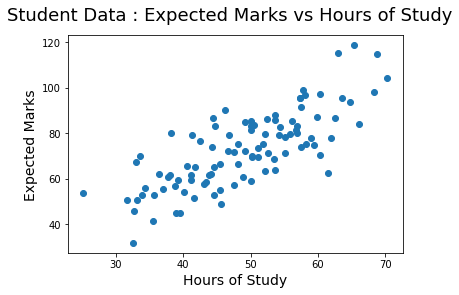

In [ ]:
fig = plt.figure()
plt.scatter(X, Y)
fig.suptitle('Student Data : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()

### Hyperparameters

In [ ]:
learning_rate = 0.0001
max_iteration = 40

### Parameters

In [ ]:
m = 0.0 # with autograd need to assign floats!
b = 0.0

### Hypothesis

In [ ]:
def h (m, b, X) :
  return m * X + b

### Loss Function

In [ ]:
# when we did this without autograd, the loss was NOT used in the optimization!
# it was just used to print a diagnostic message during the optimization
# here, with autograd, we are going to use loss directly (see gradientAG)
def loss (m, b, X, Y):
  return (1/np.size(Y))*np.sum(np.square(Y - h(m, b, X))) / 2
# for autograd to work, need to remove use of np.average
# and replace with 1/N * np.sum... in the loss function
# because ow autograd will complain that it can't do its
# thing with np.average (and in an obscure manner)


### Calculate Gradients

In [ ]:
# old gradient function that was manually derived from the loss function
# not used in the autograd version
def gradient (m, b, X, Y) :
  dm = - np.average((Y - h(m, b, X)) * X)
  db = - np.average(Y - h(m, b, X))
  return (dm, db)

In [ ]:
# Note: autograd is used to derive the gradients
# For A1 we will ignore this!
#grad_loss_m = grad(loss,0) # grad of loss wrt 0th arg, m
#grad_loss_b = grad(loss,1) # grad of loss wrt 1st arg, b
#
#def gradientAG (m, b, X, Y) :
#  dm = grad_loss_m(m,b,X,Y)
#  db = grad_loss_b(m,b,X,Y)
#  return (dm, db)
# debug stuff ... used to figure out why autograd complained
# when loss had an np.average in it; keeping it in the code
# so students can understand how to debug something...
#print("m",m)
#print("b",b)
#print("X",X)
#print("Y",Y)
#f=grad(loss,0)
#gradientAG(m,b,X,Y)
#help(f)
#f=grad(loss)
#f(m,b,X,Y)


### Gradient Descent

In [ ]:
def gradient_descent (m, b, X, Y, learning_rate, max_iteration) :
  for i in range(max_iteration) :
    # replace the call to gradient with gradientAG for autograd
    #dm, db = gradientAG (m, b, X, Y)
    dm, db = gradient (m, b, X, Y)

    m -= learning_rate * dm
    b -= learning_rate * db
    if i % 10 == 0 :
      print ('iteration : ', i, ' loss : ', loss(m, b, X, Y))
  return (m, b)

### Train Model

In [ ]:
m, b = gradient_descent (m, b, X, Y, learning_rate, max_iteration)

iteration :  0  loss :  56.324963270541446
iteration :  10  loss :  56.324872813436855
iteration :  20  loss :  56.324782531451376
iteration :  30  loss :  56.32469225682517


### Optimal values of Parameters using Trained Model

In [ ]:
m, b

(1.4788735489646005, 0.031471170292993914)

### Linear Regression using *polyfit*  function of **numpy**

In [ ]:
np_m, np_b = np.polyfit(X, Y, 1)

### Optimal values of Parameters using Numpy Linear Regression

In [ ]:
np_m, np_b

(1.32243102275536, 7.991020982270385)

### Visualize the Data

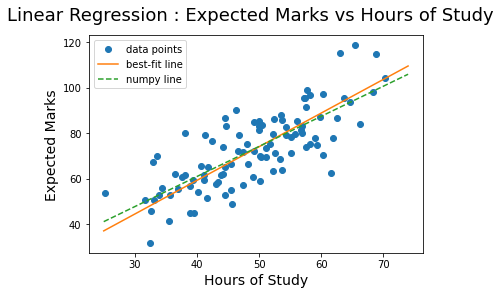

In [ ]:
fig = plt.figure()

# Generate data for plotting Line
x = np.arange(25, 75)
y = [m * x_i + b for x_i in x]

# Generate data for plotting Line Numpy Linear Regression
np_x = np.arange(25, 75)
np_y = [np_m * x_i + np_b for x_i in np_x]

# plot data and best-fit lines
plt.plot(X, Y, 'o', x, y, '-', np_x, np_y, '--')
plt.legend(loc='upper left', labels=['data points', 'best-fit line', 'numpy line'])

fig.suptitle('Linear Regression : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()

In [ ]:
# Supplement: magnitude of gradients
# A student asked a question regarding the magnitude of the w vs b gradients
# We can mod the GD code to expose this and investigate
def instrument_gradient_descent (m, b, X, Y, learning_rate, max_iteration) :
  gm=[]
  gb=[]
  for i in range(max_iteration) :
    # replace the call to gradient with gradientAG for autograd
    #dm, db = gradientAG (m, b, X, Y)
    dm, db = gradient (m, b, X, Y)

    m -= learning_rate * dm
    b -= learning_rate * db
    if i % 10 == 0 :
      print ('iteration : ', i, ' loss : ', loss(m, b, X, Y))
    gm+=[dm]
    gb+=[db]
  return (gm, gb)

In [ ]:
gm, gb = instrument_gradient_descent (m, b, X, Y, learning_rate, max_iteration)

iteration :  0  loss :  56.32460198901421
iteration :  10  loss :  56.32451172801619
iteration :  20  loss :  56.32442147383059
iteration :  30  loss :  56.32433122645689


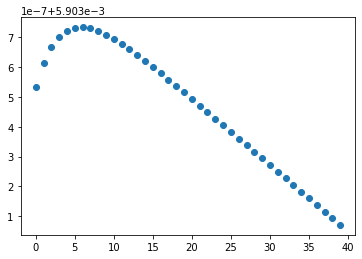

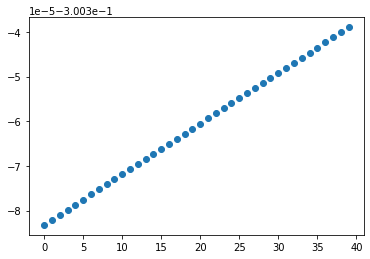

In [ ]:
fig = plt.figure()
plt.plot(gm,'o')
plt.show()
fig = plt.figure()
plt.plot(gb,'o')
plt.show()